<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment3/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras import datasets, layers, models

In [2]:
# loading the dataset

(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


array([0], dtype=uint8)

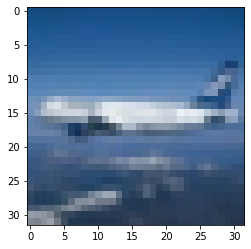

In [4]:
#randomly printing one image for data visualization
i = random.randint(1, 50000)
plt.imshow(X_train[i]) # showing the image
y_train[i] # showing the label of that images

In [5]:
# Coverting the images to gray image (32X32X1) from colored format (32X32X3)
X_train_gray = np.sum(X_train/3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims = True)

In [9]:
#Data Standardization
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [10]:
X_train_gray_norm.shape

(50000, 32, 32, 1)

In [50]:
#Given Model

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), strides = (1,1), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))

LeNet.add(layers.Conv2D(16, (5,5), strides=(1,1),activation = 'relu'))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))
LeNet.add(layers.Conv2D(120,(5,5), activation='relu'))

LeNet.add(layers.Flatten())



LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 120)              

In [51]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
LeNet.compile(optimizer = adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=25, batch_size=200, validation_split=0.2, verbose=1)

Epoch 1/25
200/200 [==============================] - 2s 6ms/step - loss: 2.0626 - accuracy: 0.2483 - val_loss: 1.9129 - val_accuracy: 0.3017
Epoch 2/25
200/200 [==============================] - 1s 5ms/step - loss: 1.8848 - accuracy: 0.3088 - val_loss: 1.8377 - val_accuracy: 0.3223
Epoch 3/25
200/200 [==============================] - 1s 5ms/step - loss: 1.8099 - accuracy: 0.3360 - val_loss: 1.7836 - val_accuracy: 0.3465
Epoch 4/25
200/200 [==============================] - 1s 5ms/step - loss: 1.7703 - accuracy: 0.3523 - val_loss: 1.7571 - val_accuracy: 0.3547
Epoch 5/25
200/200 [==============================] - 1s 5ms/step - loss: 1.7542 - accuracy: 0.3600 - val_loss: 1.7357 - val_accuracy: 0.3684
Epoch 6/25
200/200 [==============================] - 1s 5ms/step - loss: 1.7270 - accuracy: 0.3698 - val_loss: 1.7252 - val_accuracy: 0.3735
Epoch 7/25
200/200 [==============================] - 1s 5ms/step - loss: 1.7191 - accuracy: 0.3746 - val_loss: 1.7201 - val_accuracy: 0.3715
Epoch 

In [73]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), strides = (1,1), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))

LeNet.add(layers.Conv2D(16, (5,5), strides=(1,1),activation = 'relu'))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))
LeNet.add(layers.Conv2D(120,(5,5), activation='relu'))

LeNet.add(layers.Flatten())



LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
LeNet.compile(optimizer = adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_17 (Flatten)        (None, 120)             

In [74]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=25, batch_size=200, validation_split=0.2, verbose=1)

Epoch 1/25
200/200 [==============================] - 2s 6ms/step - loss: 2.1464 - accuracy: 0.2240 - val_loss: 2.0108 - val_accuracy: 0.2820
Epoch 2/25
200/200 [==============================] - 1s 5ms/step - loss: 1.9372 - accuracy: 0.3103 - val_loss: 1.8655 - val_accuracy: 0.3435
Epoch 3/25
200/200 [==============================] - 1s 5ms/step - loss: 1.8003 - accuracy: 0.3606 - val_loss: 1.7456 - val_accuracy: 0.3774
Epoch 4/25
200/200 [==============================] - 1s 5ms/step - loss: 1.7103 - accuracy: 0.3921 - val_loss: 1.6810 - val_accuracy: 0.4029
Epoch 5/25
200/200 [==============================] - 1s 5ms/step - loss: 1.6628 - accuracy: 0.4086 - val_loss: 1.6491 - val_accuracy: 0.4078
Epoch 6/25
200/200 [==============================] - 1s 5ms/step - loss: 1.6330 - accuracy: 0.4195 - val_loss: 1.6208 - val_accuracy: 0.4212
Epoch 7/25
200/200 [==============================] - 1s 5ms/step - loss: 1.6059 - accuracy: 0.4278 - val_loss: 1.6049 - val_accuracy: 0.4248
Epoch 

In [75]:
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), strides = (1,1), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))

LeNet.add(layers.Conv2D(16, (5,5), strides=(1,1),activation = 'relu'))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))
LeNet.add(layers.Conv2D(120,(5,5), activation='relu'))

LeNet.add(layers.Flatten())



LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()
adam = tf.keras.optimizers.Adam(learning_rate=100)
LeNet.compile(optimizer = adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_18 (Flatten)        (None, 120)             

In [76]:
history = LeNet.fit(X_train_gray_norm, y_train, epochs=25, batch_size=200, validation_split=0.2, verbose=1)

Epoch 1/25
200/200 [==============================] - 2s 6ms/step - loss: 905480843034624.0000 - accuracy: 0.1016 - val_loss: 45.1249 - val_accuracy: 0.1025
Epoch 2/25
200/200 [==============================] - 1s 5ms/step - loss: 51.5726 - accuracy: 0.0992 - val_loss: 44.1118 - val_accuracy: 0.0980
Epoch 3/25
200/200 [==============================] - 1s 5ms/step - loss: 48.3142 - accuracy: 0.1013 - val_loss: 55.0616 - val_accuracy: 0.1016
Epoch 4/25
200/200 [==============================] - 1s 5ms/step - loss: 55.8442 - accuracy: 0.1016 - val_loss: 60.4897 - val_accuracy: 0.1014
Epoch 5/25
200/200 [==============================] - 1s 5ms/step - loss: 53.4842 - accuracy: 0.1012 - val_loss: 78.7622 - val_accuracy: 0.1014
Epoch 6/25
200/200 [==============================] - 1s 5ms/step - loss: 52.7945 - accuracy: 0.0981 - val_loss: 45.9419 - val_accuracy: 0.1025
Epoch 7/25
200/200 [==============================] - 1s 5ms/step - loss: 48.7112 - accuracy: 0.1001 - val_loss: 47.3051 - 

Based on the given number of epoch and fixed batch size,we tested three different learning rate = 0.0001,0.01,10. Based on our study the model accuracy learning rate=0.0001 works best in training set (51%) than the other two. Learning rate is important for obtaining the global minima, very high learning rate can cause fluctuation between the local minima. On the other hand too low learning rate can results is very slow progress towards the global minima.

In [54]:
#Various Batch size=500
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), strides = (1,1), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))

LeNet.add(layers.Conv2D(16, (5,5), strides=(1,1),activation = 'relu'))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))
LeNet.add(layers.Conv2D(120,(5,5), activation='relu'))

LeNet.add(layers.Flatten())



LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, epochs=25, batch_size=500, validation_split=0.2, verbose=1)

Epoch 1/25
80/80 [==============================] - 1s 10ms/step - loss: 1.1932 - accuracy: 0.5761 - val_loss: 1.4045 - val_accuracy: 0.5101
Epoch 2/25
80/80 [==============================] - 1s 7ms/step - loss: 1.1861 - accuracy: 0.5789 - val_loss: 1.4033 - val_accuracy: 0.5089
Epoch 3/25
80/80 [==============================] - 1s 7ms/step - loss: 1.1816 - accuracy: 0.5778 - val_loss: 1.4019 - val_accuracy: 0.5115
Epoch 4/25
80/80 [==============================] - 1s 7ms/step - loss: 1.1778 - accuracy: 0.5810 - val_loss: 1.4003 - val_accuracy: 0.5127
Epoch 5/25
80/80 [==============================] - 1s 7ms/step - loss: 1.1726 - accuracy: 0.5824 - val_loss: 1.4033 - val_accuracy: 0.5138
Epoch 6/25
80/80 [==============================] - 1s 7ms/step - loss: 1.1686 - accuracy: 0.5839 - val_loss: 1.4002 - val_accuracy: 0.5143
Epoch 7/25
80/80 [==============================] - 1s 7ms/step - loss: 1.1662 - accuracy: 0.5845 - val_loss: 1.4016 - val_accuracy: 0.5130
Epoch 8/25
80/80 [=

In [57]:
#Various Batch size= 20
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), strides = (1,1), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))

LeNet.add(layers.Conv2D(16, (5,5), strides=(1,1),activation = 'relu'))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))
LeNet.add(layers.Conv2D(120,(5,5), activation='relu'))

LeNet.add(layers.Flatten())



LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, epochs=25, batch_size=20, validation_split=0.2, verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 120)              

In [58]:
#Batch size=200
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), strides = (1,1), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))

LeNet.add(layers.Conv2D(16, (5,5), strides=(1,1),activation = 'relu'))
LeNet.add(layers.MaxPooling2D(pool_size=2,strides=(2,2)))
LeNet.add(layers.Conv2D(120,(5,5), activation='relu'))

LeNet.add(layers.Flatten())



LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, epochs=25, batch_size=200, validation_split=0.2, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_7 (Flatten)         (None, 120)              

In [59]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1347 - accuracy: 0.6132


2. Three different batch size is tested = 20,200,500. Based on the training and validation set result, very low batch size can result in overfitting in the training set. On the contrary too large batch size causes underfitting. Optimum performance is seen with batch size=200 where training set accuracy is 69% and validation set accuracy is 61% resulting in test accuracy 61.32%.

In [70]:
#Best Performance
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu', input_shape= (32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(32, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())
LeNet.add(layers.Conv2D(64, (5,5), activation = 'relu'))

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, epochs=40, batch_size=200, validation_split=0.2, verbose=1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 average_pooling2d_13 (Avera  (None, 14, 14, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_43 (Conv2D)          (None, 10, 10, 32)        12832     
                                                                 
 average_pooling2d_14 (Avera  (None, 5, 5, 32)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_44 (Conv2D)          (None, 1, 1, 64)          51264     
                                                                 
 flatten_15 (Flatten)        (None, 64)              

In [71]:
score = LeNet.evaluate(X_test_gray_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3636 - accuracy: 0.6467


3. Increasing model complexity provides better performance in the validation set. With the default learning rate, and batch size of 200 we increased number of kernels in each layer and added a dense layer to increase the model complexity and it resulted an accuracy of almost 66%. Increasing epoch slightly contributes to the accuracy as well.  


In [125]:
#Equivalent Feed Forward Network
from tensorflow import keras
# Sequential Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,1)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()
history = model.fit(X_train_gray_norm, y_train, epochs=25, batch_size=200)
#Test Accuracy
score =model.evaluate(X_test_gray_norm, y_test)
print('Test accuracy:', score[1])

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_61 (Flatten)        (None, 1024)              0         
                                                                 
 dense_255 (Dense)           (None, 6)                 6150      
                                                                 
 dense_256 (Dense)           (None, 16)                112       
                                                                 
 dense_257 (Dense)           (None, 120)               2040      
                                                                 
 dense_258 (Dense)           (None, 84)                10164     
                                                                 
 dense_259 (Dense)           (None, 10)                850       
                                                                 
Total params: 19,316
Trainable params: 19,316
Non-tra

In [124]:
#Equivalent Feed Forward Network
from tensorflow import keras
# Sequential Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,1)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()
history = model.fit(X_train_gray_norm, y_train, epochs=25, batch_size=200)
#Test Accuracy
score =model.evaluate(X_test_gray_norm, y_test)
print('Test accuracy:', score[1])

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_60 (Flatten)        (None, 1024)              0         
                                                                 
 dense_250 (Dense)           (None, 32)                32800     
                                                                 
 dense_251 (Dense)           (None, 64)                2112      
                                                                 
 dense_252 (Dense)           (None, 128)               8320      
                                                                 
 dense_253 (Dense)           (None, 64)                8256      
                                                                 
 dense_254 (Dense)           (None, 10)                650       
                                                                 
Total params: 52,138
Trainable params: 52,138
Non-tra

4. (a)In this simple feed forward network can provide an accuracy of 33% which is quite well compared to the number of learnable parameters of CNN (almost 3 times). But feed forward network cannot capture the complexity of the given dataset were as LeNet framework can obtain an accuracy of 65% with the same number of layers.
(b) We created another feed forward network with same number of layer but higher learnable parameters close to LeNet models no of parameters as here we can see the accuracy increased only 7% (accuracy=40%). So it is not worth it. 